In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

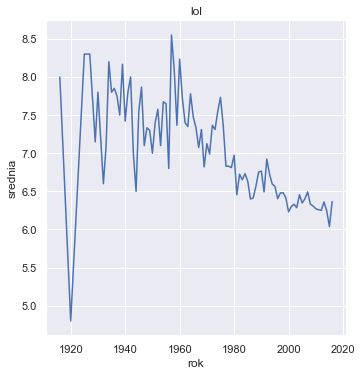

In [41]:
date: pd.DataFrame = pd.read_csv('dane.csv', sep='^')
    
date = date.select_dtypes(include=['int','float'])

def get_column_name(df: pd.DataFrame, mean: float, std: float) ->str:
     for i in df.columns:
        if round(df[str(i)].mean(), 6) == mean:
            return str(i)

col_rename: Dict[str,str] ={
    get_column_name(date, 691.014541, 10):'X',
    get_column_name(date, 631.276313, 10):'Y',
    get_column_name(date, 6494.488491, 10):'Z',
    get_column_name(date, 2002.447609, 10):'year',
    get_column_name(date, 6.437429, 10):'score',
    'P': 'scheme'
}
    
date = date.rename(columns = col_rename)

sns.set_theme(style='darkgrid')

date = date.sort_values('year', ascending=False)

sns.set_theme(style='darkgrid')

plt.figure(figsize=(15, 15)) 

tmp: pd.DataFrame = date.groupby('year').agg({'score':'mean'}).sort_values('year', ascending=False)
    
sns.relplot(x='year', y='score', kind='line', data=tmp, ci=None)  

plt.title('lol')
plt.ylabel('srednia')
plt.xlabel('rok')


plt.show()
